## HW5: Webscraping and Pandas

Note that this is a modified version of HW5.  The first part, concerning the use of selenium, is just for your edification.

In [1]:
from bs4 import BeautifulSoup as bsoup
import requests
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from datetime import datetime

#### Note that you need the driver binaries in a system path.  To view those paths you can run the following shell command.

In [ ]:
!echo $PATH
#print(os.getcwd())

#### Setting the service object and initializing the driver.

In [ ]:
'''
options = webdriver.ChromeOptions()
options.binary_location=r"C:\Program Files\Google\Chrome\Application\chrome.exe"
chrome_driver_binary = r"/mnt/c/WINDOWS/chromedriver.exe"
driver = webdriver.Chrome(chrome_driver_binary, chrome_options=options)
driver.get("https://weather.com")
#s=Service(ChromeDriverManager().install())
#driver = webdriver.Chrome(service=s)
#driver.maximize_window()
#driver.get('https://www.google.com')
#driver.get("https://www.weather.com")
#s = Service('chromedriver.exe')
#driver = webdriver.Chrome(service=s)
#driver = webdriver.Chrome(executable_path='/mnt/c/WINDOWS/chromedriver.exe')
#driver.get('https://weather.com/')

soup = bsoup(driver.page_source, 'lxml')
'''

In [ ]:
'''
search_string = 'USA, 80208'
zipsearch = driver.find_element(By.ID, "LocationSearch_input")
zipsearch.send_keys(search_string)
sleep(10)
driver.find_element(By.XPATH, '//*[@id="LocationSearch_listbox-0"]').click()
'''

## The Actual Assignment Starts Here (9 points total)

### Monthly weather can be accessed through weather.com by passing lat and lon coordinates in the URL.  For this assignment we will specify one pair of lat/lon coordinates and scrape the montly weather data from that page.  See below for an example url. Note that we could easily extend this by specifying a list of tuples and iterating over those coordinate pairs.

__For this part, all you need to do is specify lat/lon coords and make a good request.__ (1 point)

https://weather.com/weather/monthly/l/39.7393,-104.9844

In [2]:
locations = (42.861229, -71.625526) # your tuple of lat/lon coords.

base_url = "https://weather.com/weather/monthly/l/"
temp_url = base_url + str(locations[0]) + ',' + str(locations[1])

response = requests.get(temp_url)

In [3]:
response.status_code

200

In [4]:
soup = bsoup(response.text, 'lxml')

<!DOCTYPE html>
<html dir="ltr" lang="en-US">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Weather.com brings you the most accurate monthly weather forecast for Amherst, NH with average/record and high/low temperatures, precipitation and more." data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/monthly/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content="app-id=295646461" data-react-helmet="true" na
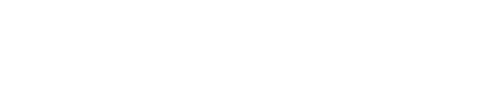
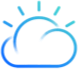

In [5]:
print(soup.prettify())

#### Below, to get you started I've run find_all using a very basic regex to match the class name we're concerned with.

In [6]:
import re

cal = soup.find_all('button', {'class': re.compile('Button--default--3zkvy CalendarDateCell*')})

#### Below we're printing out the information comprising a single calendar day.

In [7]:
print(cal[0])

<button class="Button--default--3zkvy CalendarDateCell--dayCell--2s4Tp CalendarDateCell--firstCell--1FnOi CalendarDateCell--firstRow--1_xoa" data-id="calendar-9/25" data-testid="ctaButton" type="button"><div class="CalendarDateCell--iconAstro--1zr6m CalendarDateCell--small--9hM8W"><svg aria-hidden="true" class="Icon--icon--3wCKh Icon--fullTheme--3ns8p" data-testid="Icon" height="1024" name="phase-29" role="img" set="astro" theme="full" viewbox="0 0 996 1024" width="996"><title>Moon Phase - Day 29</title><path d="M501.389 1009.31q-202.671 0-346.869-143.914T10.323 518.245q0-202.671 144.197-346.869T501.389 27.179q202.103 0 346.584 144.197t144.481 346.869q0 203.238-144.481 347.151T501.389 1009.31z"></path></svg></div><span class="CalendarDateCell--date--3Fw3h">25</span><div class="CalendarDateCell--icon--2NA_0"><svg aria-hidden="true" class="Icon--icon--3wCKh Icon--fullTheme--3ns8p" data-testid="Icon" name="rain" role="img" set="weather" theme="full" viewbox="0 0 200 200"><title>Rain</titl

### We can continue to use bs4 to parse these data, or we can cast the elements in cal (our days) to str and use str methods to parse.  This is up to you.

_**Pull out the following information for each day and store them in a Pandas DataFrame:**_  (3 points)

-month: The month component of the date.  Note date is expressed as month/day. For example, 9/25.

-day: Numerical day of the month

-moon_phase: Day n

-weather_desc: (e.g., mostly cloudy, sunny, rain, etc.)

_**Also build a new feature, day, which will represent the day of the week (e.g., Monday, Tuesday, etc.)
This information isn't included in the text, but can be computed. Retain the weather_desc feature. **_ (1 point)

In [8]:
#
# Practice getting data from single day
#
month = datetime.strptime(cal[0]['data-id'][9:], '%m/%d').month
day = cal[0].span.text
print(month)
print(day)
weather = cal[22].find("div",{'class':'CalendarDateCell--icon--2NA_0'},'svg').text
#weather = cal[0].find("div",{'class':'CalendarDateCell--icon--2NA_0'},"svg")
print(weather)
temp_high = cal[22].find("div",{'class':'CalendarDateCell--tempHigh--2VBba'},'span').text[:-1]
print(temp_high)
#temp_low = cal[0].find("div",{'class':'CalendarDateCell--tempLow--2Cs14'},'span').text[:-1]
temp_low = cal[0].find("div",{'class':'CalendarDateCell--temps--10Lpc', 'class':'CalendarDateCell--tempLow--2Cs14'},'span').text[:-1]
print(temp_low)
moon = cal[0].div.svg.title.text[13:]
print(moon)
moon_two = cal[0].find("div",{'class':'CalendarDateCell--iconAstro--1zr6m'},'svg').text[13:]
print(moon_two)


9
25
Scattered Showers
58
54
Day 29
Day 29


In [9]:
month_list = []
day_list = []
moon_list = []
weather_list = []    
temp_low_list = []
temp_high_list = []

for day in range(len(cal)):
    data = cal[day]
    try:
        month_list.append(datetime.strptime(data['data-id'][9:], '%m/%d').month)
        day_list.append((data.span.text))
        moon_list.append(data.find("div",{'class':'CalendarDateCell--iconAstro--1zr6m'},'svg').text[13:])
        weather_list.append(data.find("div",{'class':'CalendarDateCell--icon--2NA_0'},'svg').text)
        # I ran into trouble automatically converting these temps into an int, so I did it later
        temp_low_list.append(data.find("div",{'class':'CalendarDateCell--temps--10Lpc', 'class':'CalendarDateCell--tempLow--2Cs14'},'span').text[:-1])
        temp_high_list.append(data.find("div",{'class':'CalendarDateCell--temps--10Lpc','class':'CalendarDateCell--tempHigh--2VBba'},'span').text[:-1])
        
    except Exception as e:
        #print('except at: ', str(day), print(e))
        # append '-' for temp vals for easier conversion to int
        weather_list.append(None)
        temp_low_list.append('-')
        temp_high_list.append('-')

#print(len(month_list),len(day_list),len(moon_list),len(weather_list),len(temp_low_list),len(temp_high_list))
temp_low_list = [int(i) if i.lstrip('-').isdigit() else None for i in temp_low_list]
temp_high_list = [int(i) if i.lstrip('-').isdigit() else None for i in temp_high_list]
weatherDF = pd.DataFrame({'month':month_list, 'day':day_list, 'moon_phase':moon_list, 'weather_desc':weather_list, 'temp_low':temp_low_list, 'temp_high':temp_high_list})
print(weatherDF)


    month day moon_phase        weather_desc  temp_low  temp_high
0       9  25     Day 29                Rain      54.0       65.0
1       9  26      Day 1                Rain      48.0       73.0
2       9  27      Day 2       Partly Cloudy      48.0       72.0
3       9  28      Day 3       Partly Cloudy      47.0       69.0
4       9  29      Day 4       Partly Cloudy      40.0       64.0
5       9  30      Day 5        Mostly Sunny      42.0       63.0
6      10   1      Day 6                Rain      49.0       60.0
7      10   2      Day 7       Partly Cloudy      38.0       55.0
8      10   3      Day 7       Partly Cloudy      43.0       57.0
9      10   4      Day 8   Scattered Showers      51.0       61.0
10     10   5     Day 10   Scattered Showers      52.0       60.0
11     10   6     Day 11       Partly Cloudy      49.0       76.0
12     10   7     Day 12       Partly Cloudy      45.0       77.0
13     10   8     Day 13       Partly Cloudy      33.0       60.0
14     10 

### Now build the following feature:

-temp_diff: The difference between the high and low daily temperature. (1 point)

In [10]:
weatherDF['temp_diff'] = weatherDF['temp_high'].sub(weatherDF['temp_low'], fill_value=0)
print(weatherDF)

    month day moon_phase        weather_desc  temp_low  temp_high  temp_diff
0       9  25     Day 29                Rain      54.0       65.0       11.0
1       9  26      Day 1                Rain      48.0       73.0       25.0
2       9  27      Day 2       Partly Cloudy      48.0       72.0       24.0
3       9  28      Day 3       Partly Cloudy      47.0       69.0       22.0
4       9  29      Day 4       Partly Cloudy      40.0       64.0       24.0
5       9  30      Day 5        Mostly Sunny      42.0       63.0       21.0
6      10   1      Day 6                Rain      49.0       60.0       11.0
7      10   2      Day 7       Partly Cloudy      38.0       55.0       17.0
8      10   3      Day 7       Partly Cloudy      43.0       57.0       14.0
9      10   4      Day 8   Scattered Showers      51.0       61.0       10.0
10     10   5     Day 10   Scattered Showers      52.0       60.0        8.0
11     10   6     Day 11       Partly Cloudy      49.0       76.0       27.0

### Build Dummy Variables to represent weather_desc.  These are binary features.  You will have one for each of the unique categories in weather_desc.  These categories only need to represent the data that you have scraped. 
(1 point)

In [11]:
weather_desc = weatherDF['weather_desc'].unique()
#print(weather_desc)
dummydf = pd.get_dummies(weatherDF["weather_desc"])
#print(dummydf)
# combining all dummydf columns to append to new df to then concat with weatherDF
dummydf['weather_desc_binary'] = dummydf[dummydf.columns[1:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)
df = dummydf['weather_desc_binary']
weatherDF = pd.concat((weatherDF, df), axis=1)
print(weatherDF)

    month day moon_phase        weather_desc  temp_low  temp_high  temp_diff  \
0       9  25     Day 29                Rain      54.0       65.0       11.0   
1       9  26      Day 1                Rain      48.0       73.0       25.0   
2       9  27      Day 2       Partly Cloudy      48.0       72.0       24.0   
3       9  28      Day 3       Partly Cloudy      47.0       69.0       22.0   
4       9  29      Day 4       Partly Cloudy      40.0       64.0       24.0   
5       9  30      Day 5        Mostly Sunny      42.0       63.0       21.0   
6      10   1      Day 6                Rain      49.0       60.0       11.0   
7      10   2      Day 7       Partly Cloudy      38.0       55.0       17.0   
8      10   3      Day 7       Partly Cloudy      43.0       57.0       14.0   
9      10   4      Day 8   Scattered Showers      51.0       61.0       10.0   
10     10   5     Day 10   Scattered Showers      52.0       60.0        8.0   
11     10   6     Day 11       Partly Cl

#### Use your DataFrame to answer the following questsions.

__Using only the data you collected from a single page (42 days).  What is the average high temperature for each month?__ (1 point)

In [12]:
avg_high = weatherDF.sort_values('temp_high').groupby(weatherDF['month']).max(numeric_only=True)['temp_high']
print(avg_high)

month
9     73.0
10    77.0
11     NaN
Name: temp_high, dtype: float64


__Pivot your DataFrame to show the average high temperature over the entire dataset by the weather_desc categories__ (1 point)

In [13]:
pivot = pd.pivot_table(data=weatherDF, index='weather_desc', values='temp_high')
print(pivot)

                   temp_high
weather_desc                
Mostly Sunny            60.0
Partly Cloudy           66.5
Rain                    65.8
Scattered Showers       62.2
Sunny                   71.0
